In [2]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

df = pd.DataFrame({"f1": X[:, 0], "f2": X[:, 1]})
df.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


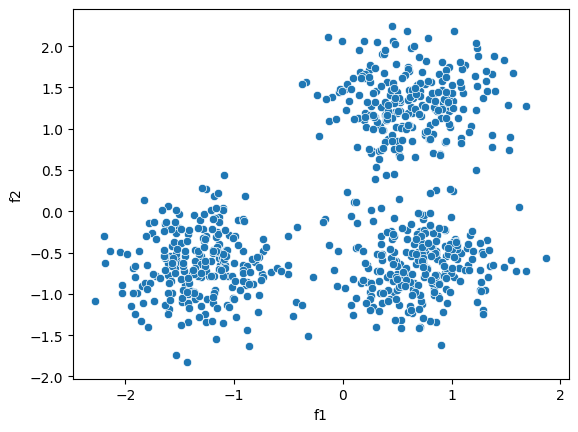

In [4]:
from matplotlib import pyplot as plt

sns.scatterplot(df, x="f1", y='f2')
plt.show()

In [6]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.3, min_samples=10)

dbs.fit(df)

DBSCAN(eps=0.3, min_samples=10)

In [ ]:
df['Cluster'] = dbs.labels_

In [16]:
df['Cluster'].value_counts()

Cluster
 2    245
 1    244
 0    243
-1     18
Name: count, dtype: int64

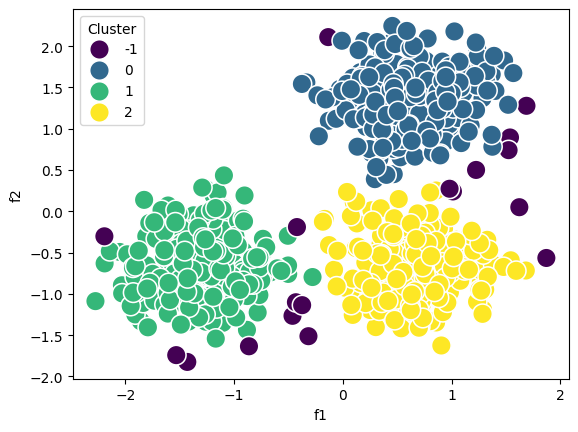

In [ ]:
sns.scatterplot(df, x='f1', y='f2', hue='Cluster', palette='viridis', s=200)
plt.show()

In [52]:
def funWithDBScan(data, ep=0.3, ms=10):
    dbs = DBSCAN(eps=ep, min_samples=ms)
    dbs.fit(data[['f1', 'f2']])
    data['Cluster'] = dbs.labels_
    display(data['Cluster'].value_counts())
    sns.scatterplot(data, x='f1', y='f2', hue='Cluster', palette='viridis', s=200)
    plt.title(f'Scatterplot with eps: {ep}, and min_samples: {ms}')
    plt.show()

Cluster
 2    245
 1    244
 0    243
-1     18
Name: count, dtype: int64

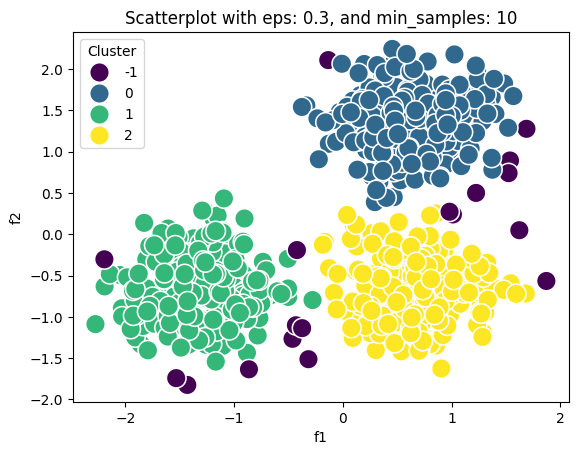

In [53]:
funWithDBScan(df)

Cluster
 1    230
 0    225
 2    225
-1     70
Name: count, dtype: int64

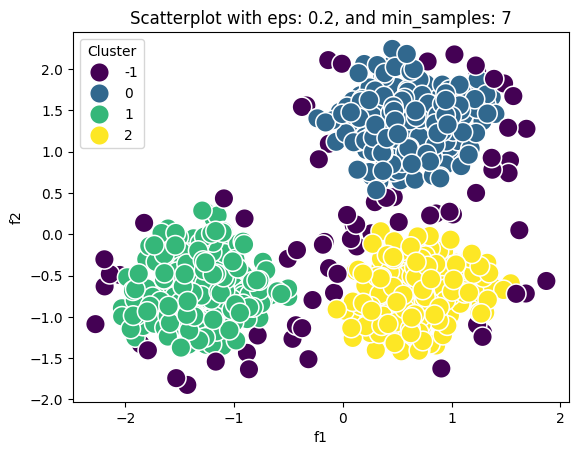

Cluster
 0    236
 1    235
 2    235
-1     44
Name: count, dtype: int64

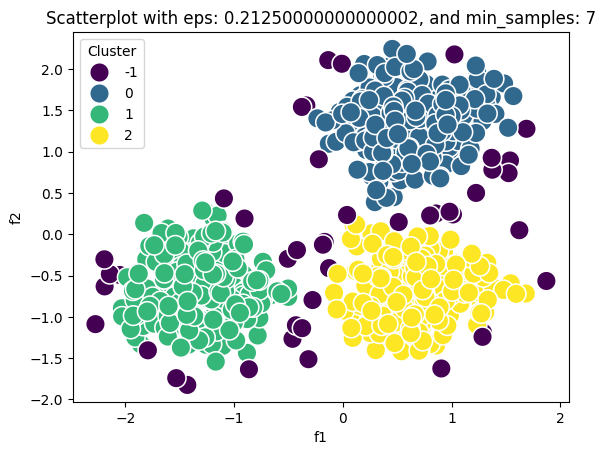

Cluster
 0    239
 1    238
 2    235
-1     38
Name: count, dtype: int64

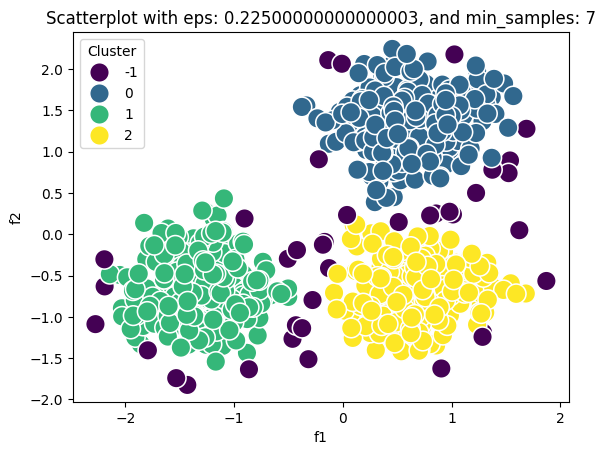

Cluster
 1    241
 0    239
 2    237
-1     33
Name: count, dtype: int64

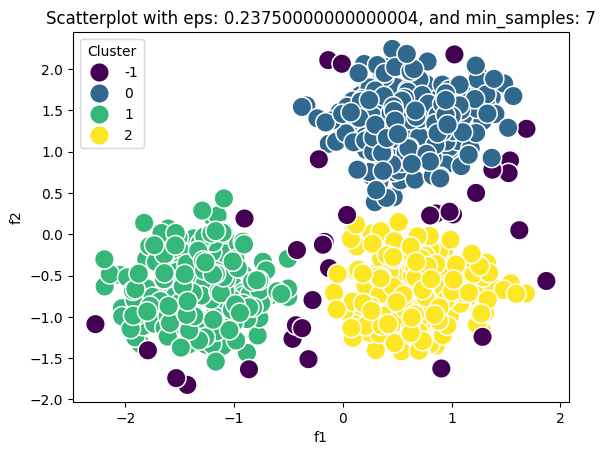

Cluster
 1    244
 2    241
 0    240
-1     25
Name: count, dtype: int64

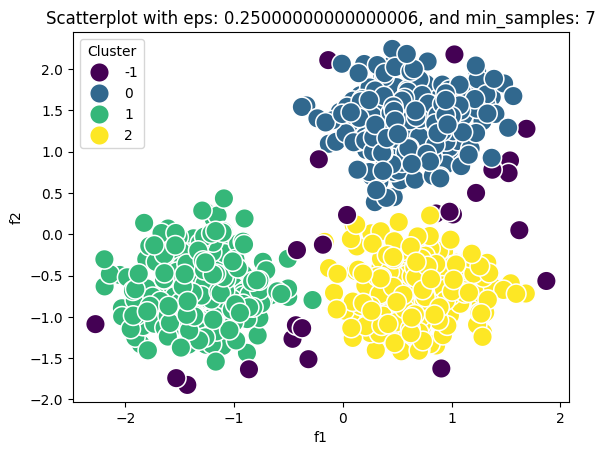

Cluster
 1    244
 2    242
 0    240
-1     24
Name: count, dtype: int64

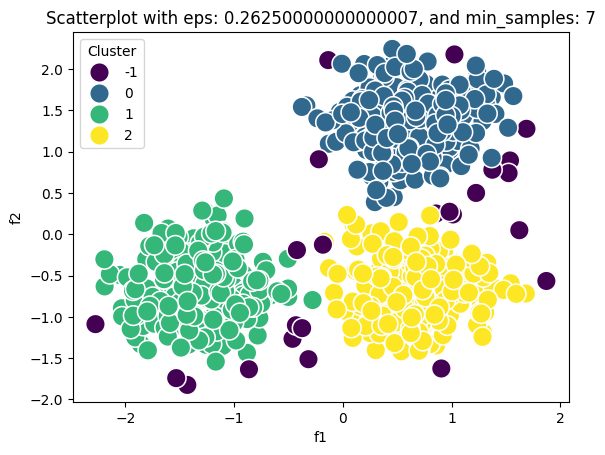

Cluster
 1    245
 2    243
 0    242
-1     20
Name: count, dtype: int64

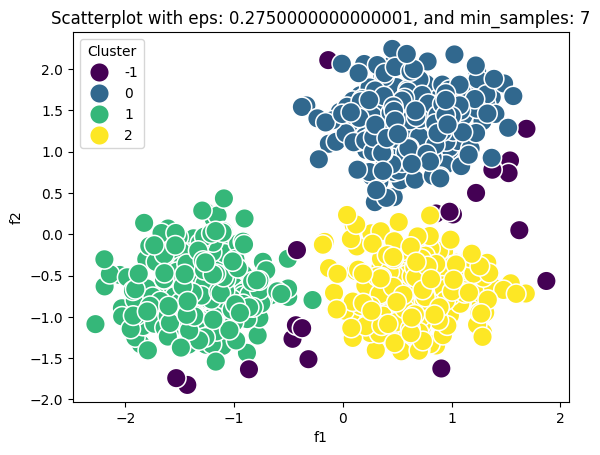

Cluster
 2    247
 1    245
 0    243
-1     15
Name: count, dtype: int64

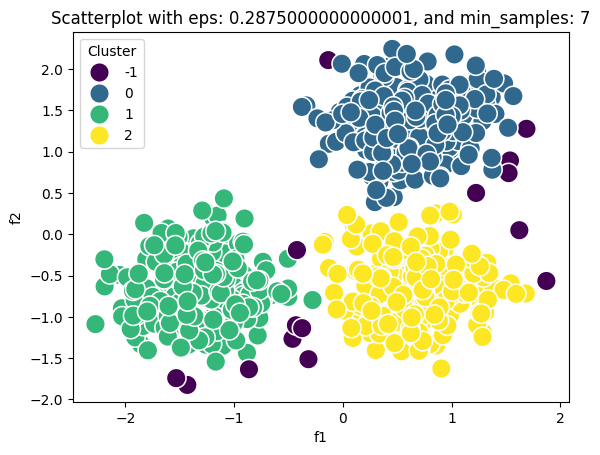

Cluster
 2    247
 0    245
 1    245
-1     13
Name: count, dtype: int64

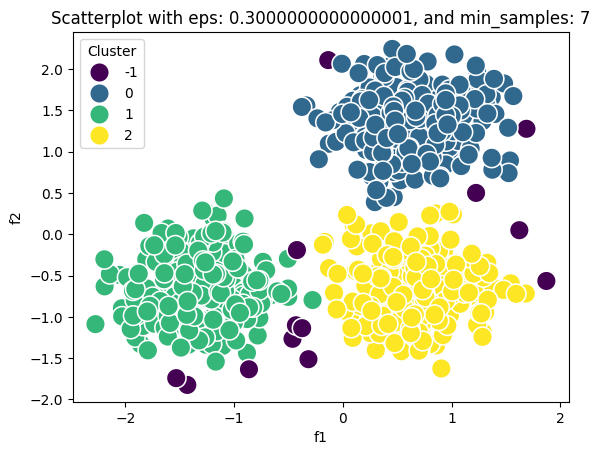

In [62]:
import numpy as np
eps_vals = np.arange(0.2,0.3125, 0.0125)
for eps in eps_vals:
    funWithDBScan(df, ep=eps, ms=7)